To render:

jupyter nbconvert presentation.ipynb --to slides --post serve

# Emotion

In [14]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
plt.ioff()

dataset = load_dataset("emotion")

Found cached dataset emotion (/home/caelan/.cache/huggingface/datasets/emotion/default/0.0.0/348f63ca8e27b3713b6c04d723efe6d824a56fb3d1449794716c0f0296072705)


  0%|          | 0/3 [00:00<?, ?it/s]

## The Numbers

<div>
<table align="left">
  <tr>
    <th>Total</th>
    <th>Training</th>
    <th>Validation</th>
    <th>Testing</th>
  </tr>
  <tr>
    <td>20,000</td>
    <td>16,000</td>
    <td>2,000</td>
    <td>2,000</td>
  </tr>
</table>
</div>



<div>
Each observation is a tweet.

Average length: 19.13 tokens.
</div>

In [8]:
# Set dataset format to pandas
dataset.set_format(type='pandas', columns=['text','label'])

# Count and normalize number of labels
counts = dataset['train']['label'].value_counts() + dataset['validation']['label'].value_counts() + dataset['test']['label'].value_counts()
counts = counts.rename('Counts')
counts_norm = dataset['train']['label'].value_counts(normalize=True)
counts_norm = counts_norm.rename('Proportion')

# Generate dataframe of total counts and proportions
labels = pd.Series(dataset['train'].features['label'].names)
labels = labels.rename('Labels')
totals = pd.concat([counts.sort_index(), counts_norm.sort_index(), labels], axis=1)

# Show the first 10 entries
head = pd.DataFrame([dataset['train']['text'], dataset['train']['label']]).transpose().head(9)

In [9]:
display(totals)
display(head)

,Counts,Proportion,Labels
0,5797,0.291625,sadness
1,6761,0.335125,joy
2,1641,0.081500,love
3,2709,0.134937,anger
4,2373,0.121063,fear
5,719,0.035750,surprise


,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3
5,ive been feeling a little burdened lately wasn...,0
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,4
8,i have been with petronas for years i feel tha...,1


In [15]:
# Create a bar chart of counts
graph = counts.sort_index().plot.bar(rot=0)
graph.set(xlabel='Labels', ylabel='Quantity')
graph.set_xticks([0,1,2,3,4,5], labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])


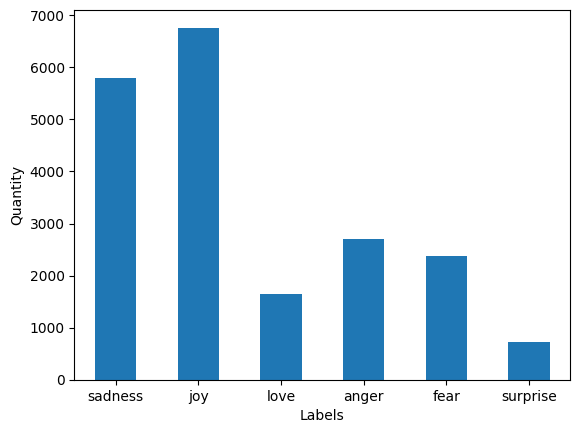

In [13]:
plt.show()

## Baseline Model

Model used: Random Forest Classifier

### Validation Data
Before tuning hyperparameters

Accuracy: 87.4%

<img src="images/rfc_valid.png" alt="Validation Data" width="600"/>

### Testing Data
After tuning hyperparameters 

n_estimators:       160 <br>
min_samples_split:  3 

Accuracy:           86.75%

<img src="images/rfc_test.png" alt="Testing Data" width="550"/>